                    Analyze sales data from more than 16,500 games.

Sales data from more than 16,500 games is interesting dataset to analyze the game's industry business side. As a person, who likes to play games it will be double interesting for me to analyze sales videogames data as well as this analysis could give ideas for investors to understand which games, genres, publishers can generate higher Global sales. As well as to understand the correlation between European and Japanese and North American markets.

The dataset used is called Video Game Sales and is available for free on Kaggle. Kaggle is a webservice that supplies a broad variation of datasets for free. The Formula 1 dataset consists of 13 different csv files. There is a seperate file for drivers, constructors, lap times, pit stops, ... Some files can be linked together using id's.

This analysis is part of the course Data Analysis with Python: Zero to Pandas. This course starts with entry level Python programming and is thus available for everyone. The lessons are clearly explained and there is a wide community of people to help answer questions. If you are looking to get into Python I can highly recommend any of the courses listed here. Great thanks to Jovian for the (free) high quality lessons.


## Downloading the Dataset

The dataset is available for free on Kaggle. The dataset consists of 1 file:

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
There are 16,598 records. 2 records were dropped due to incomplete information.

Opendatasets is used to download all the datasets. Let's start by installing this library.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/gregorut/videogamesales' 

In [3]:
#A (free) account on Kaggle is needed in order to download this dataset. This way the latest data is acquired.

In [5]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: iluhajapan
Your Kaggle Key: ········


100%|██████████| 381k/381k [00:00<00:00, 94.4MB/s]

The dataset has been downloaded and extracted.

In [6]:
data_dir = './videogamesales'

In [7]:
import os
os.listdir(data_dir)

['vgsales.csv']

Let us save and upload our work to Jovian before continuing.

In [8]:
project_name = "data_analyst_project_iliyas" # change this (use lowercase letters and hyphens only)

In [9]:
!pip install jovian --upgrade -q

In [10]:
import jovian

In [11]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "iak37292/data-analyst-project-iliyas" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/iak37292/data-analyst-project-iliyas


'https://jovian.com/iak37292/data-analyst-project-iliyas'

## Data Preparation and Cleaning




The data is already pretty clean. Missing data is indicated with 'NaN'. We need to also fix data tytpe issues, as we can see later that type of Year column is float, so we need to need to convert it to datetime type, as it will be very helpful later to analyze data and put it in graph

In [12]:
import numpy as np
import pandas as pd

In [13]:
sales=pd.read_csv("./videogamesales/vgsales.csv")

In [14]:
from IPython.display import display
with pd.option_context('display.max_columns',50):
    display(sales)                                          # printing the whole csv data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [15]:
sales.shape

(16598, 11)

In [ ]:
# We can see that there are 16598 rows and 11 columns

In [16]:
sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
# From the above table we can see that mean of NA sales is highest among  NA sales, EU sales, JP Sales and other sales.
# We can also see that we have sales data from 1980 to 2020. 

In [17]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# From the above graph,  we can see missing values in columns as year and publisher. 
#Also we can see that type of Year column is float, but we want this column to be date type. So, we need convert it later 
#to date type.

In [18]:
sales[sales["Year"].isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [ ]:
#From this data we can see number of missing variables and it is 271 rows, most of these rows are from year and Publisher.
# and we can't just change them with other mean year or other publisher name. Even if we change it will make our analysis
#not reliable. As the number of missing values is low compared to all data, so we can drop it later 

In [19]:
sales[sales["Publisher"].isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


In [ ]:
#For simplicity, let's drop all missing values, and also we have only few missing variables, therefore it should not big deal to drop missing variables"

In [20]:
sales=sales.dropna()

In [ ]:
#So we dropped all missing values in our data

In [ ]:
#As we see from the above, year is float, but let's convert it to datetime type"

In [21]:
sales["Year"]=pd.to_datetime(sales.Year, format="%Y")

In [22]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16291 non-null  int64         
 1   Name          16291 non-null  object        
 2   Platform      16291 non-null  object        
 3   Year          16291 non-null  datetime64[ns]
 4   Genre         16291 non-null  object        
 5   Publisher     16291 non-null  object        
 6   NA_Sales      16291 non-null  float64       
 7   EU_Sales      16291 non-null  float64       
 8   JP_Sales      16291 non-null  float64       
 9   Other_Sales   16291 non-null  float64       
 10  Global_Sales  16291 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


In [23]:
# We can see that year column type is datetime64 and we can also see no missing variables.

In [24]:
import jovian

In [25]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "iak37292/data-analyst-project-iliyas" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/iak37292/data-analyst-project-iliyas


'https://jovian.com/iak37292/data-analyst-project-iliyas'

## Exploratory Analysis and Visualization

Exploratory data analysis is a way to better understand data. The numerical data will be visualized in graphs.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [26]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Let's explore revenue of global Video sales over the years and understand trend of the years

Text(0.5, 0, 'Year')

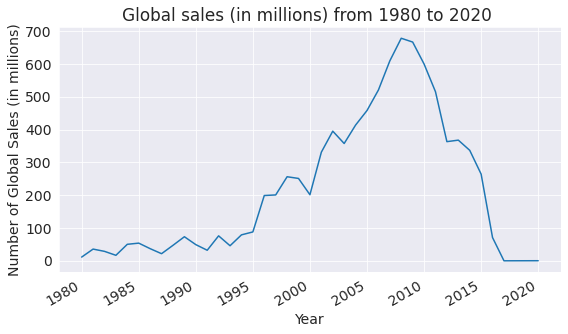

In [36]:
sales.groupby("Year")["Global_Sales"].sum().plot()
plt.ylabel("Number of Global Sales (in millions)")
plt.title("Global sales (in millions) from 1980 to 2020 ")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

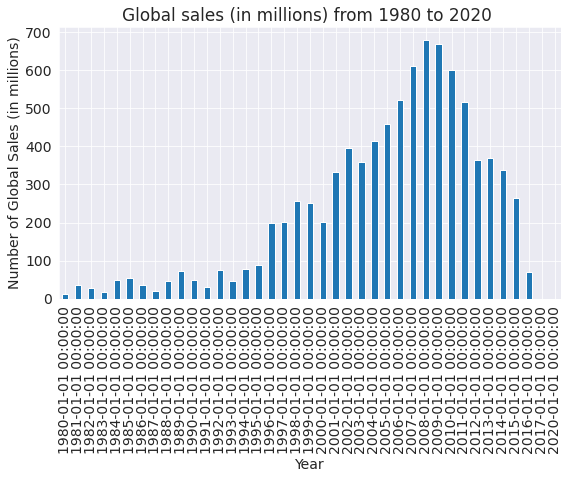

In [37]:
sales.groupby("Year")["Global_Sales"].sum().plot.bar()
plt.ylabel("Number of Global Sales (in millions)")
plt.title("Global sales (in millions) from 1980 to 2020 ")
plt.xlabel("Year")

In [38]:
# As we can see from the above the global sales was increasing from 1980 until 2009, then we can decline in sales of
# games around the world.

# Let's explore which genres generated higher global sales and understand trends

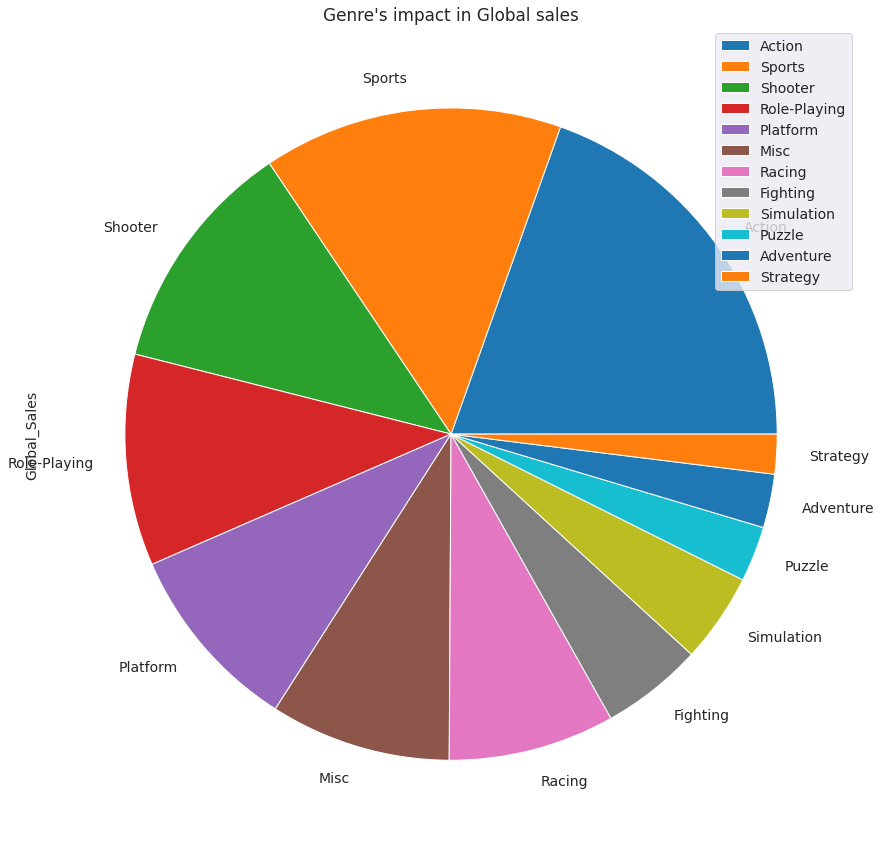

In [54]:
sales.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False).plot.pie(figsize=(25, 15))
plt.title("Genre's impact in Global sales")
plt.legend(loc="best")

In [56]:
#From the above we can see that genres such as Action, sport and shooter generated the highest global sales
#around the world.

# Let's explore which Publisher companies generated one of the highest global sales  around the world

Text(0.5, 1.0, 'Which publisher companies generate one of the highest Global sales')

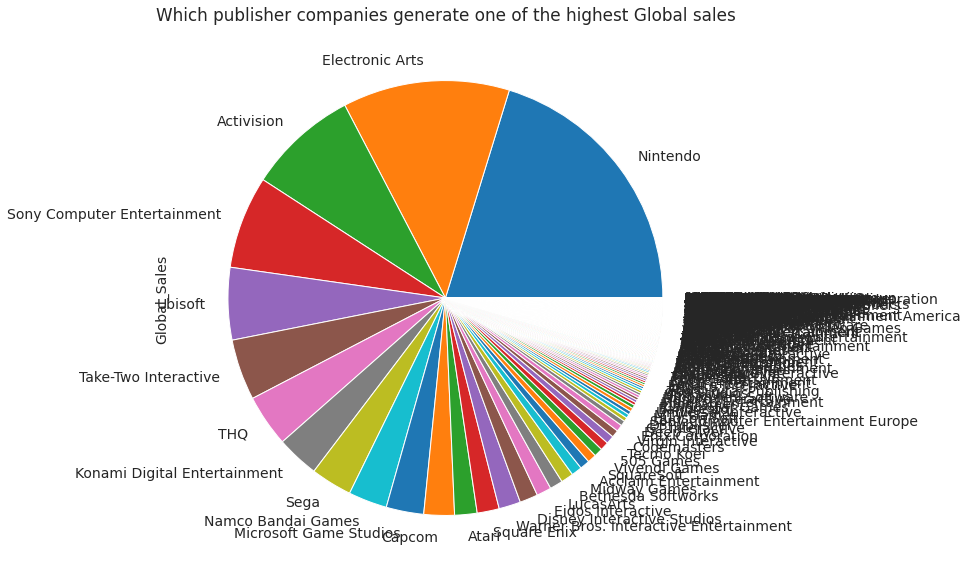

In [58]:
sales.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).plot.pie(figsize=(20, 10))
plt.title("Which publisher companies generate one of the highest Global sales")

In [ ]:
#From this graph we can see that publishers such as  Nintendo, and Electronic Arts and Activision generate a highest Global Sales"

# Let's explore which platforms generated highest global sales

Text(0.5, 1.0, 'Platforms that generated global sales')

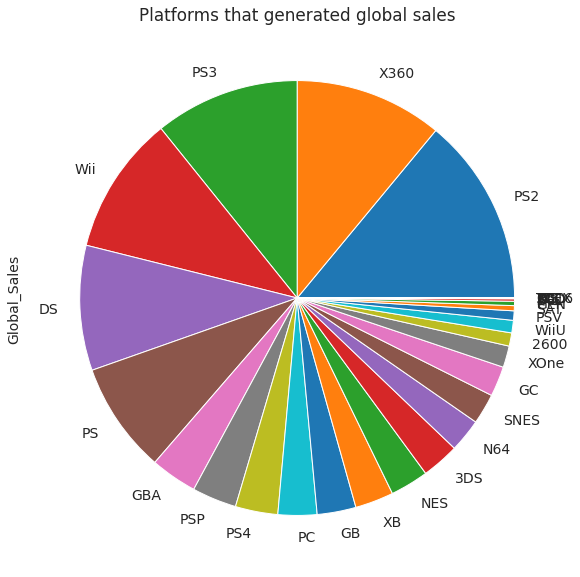

In [61]:
sales.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).plot.pie(figsize=(20, 10))
plt.title("Platforms that generated global sales")

In [ ]:
# From this graph we can see that platforms such as PS3, and PS2 and X360 generated a highest Global Sales

# Let's explore which genre games have been made the most

In [62]:
sales["Genre"].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

Text(0.5, 0, 'Genre')

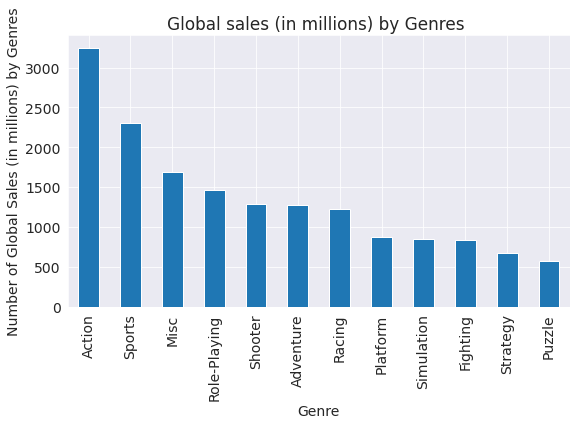

In [64]:
sales["Genre"].value_counts().plot.bar()
plt.ylabel("Number of Global Sales (in millions) by Genres")
plt.title("Global sales (in millions) by Genres ")
plt.xlabel("Genre")

In [65]:
# As we can see from the above, Actions, Sports and Misc games generate highest Global sales.

In [68]:
# Let's check also which year had the most game releases


Text(0, 0.5, 'Number of games released')

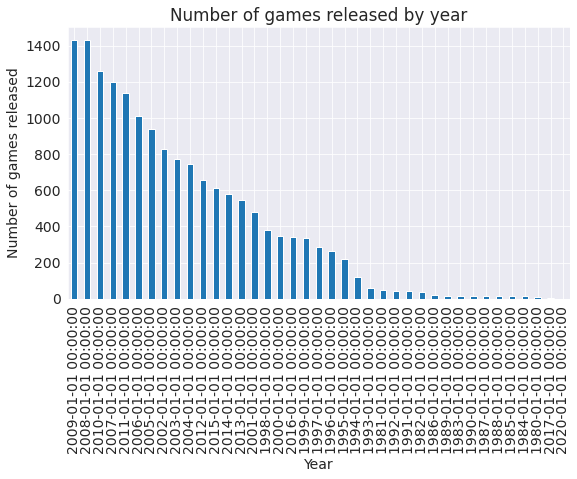

In [72]:
sales["Year"].value_counts().plot.bar()
plt.title("Number of games released by year")
plt.xlabel("Year")
plt.ylabel("Number of games released")

In [73]:
# As we can from the above 2009 and 2008 had the highest game releases

In [74]:
#Let's look also to the relations of the variables in sales by using heatmap and also it will be helpful to understand the
# correlation between variables.

<AxesSubplot:>

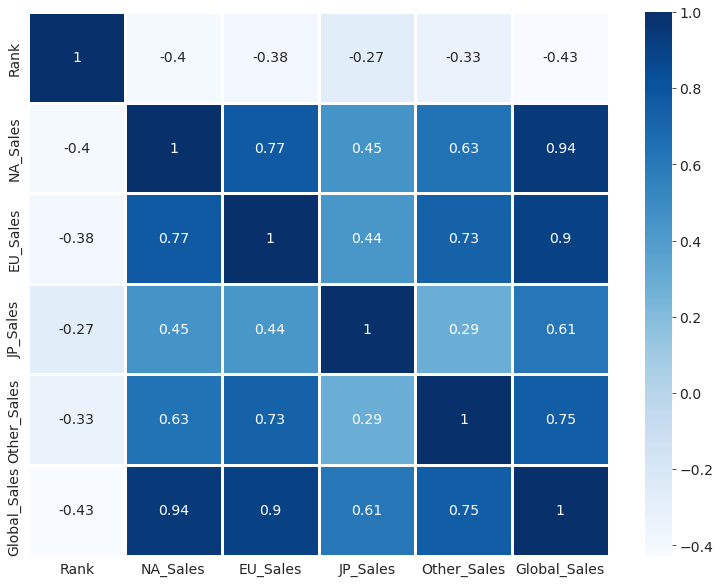

In [76]:
plt.figure(figsize=(13,10))
sns.heatmap(sales.corr(), cmap = "Blues", annot=True, linewidth=3)

In [78]:
# As we can see from above, there is highest correlation between Global Sales and North American Sales.
#We can also correlation of  0.77 between European and North American Sales. Which shows that both sales have high impact on each other.


Let us save and upload our work to Jovian before continuing

In [79]:
import jovian

In [80]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "iak37292/data-analyst-project-iliyas" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/iak37292/data-analyst-project-iliyas


'https://jovian.com/iak37292/data-analyst-project-iliyas'

## Asking and Answering Questions

Lets find out some more about Video games sales. Below five questions regarding Video games sales will be answerred.



#### Q1: Which individual game have the highest sale price globally?¶

In [ ]:
#First let's make dataframe of 20 games that generated highest global sales

In [81]:
top20=sales.sort_values("Global_Sales", ascending=False)[["Name", "Year", "Global_Sales"]].head(20)

Text(0.5, 1.0, 'Top 20 games that generated highest Global sales')

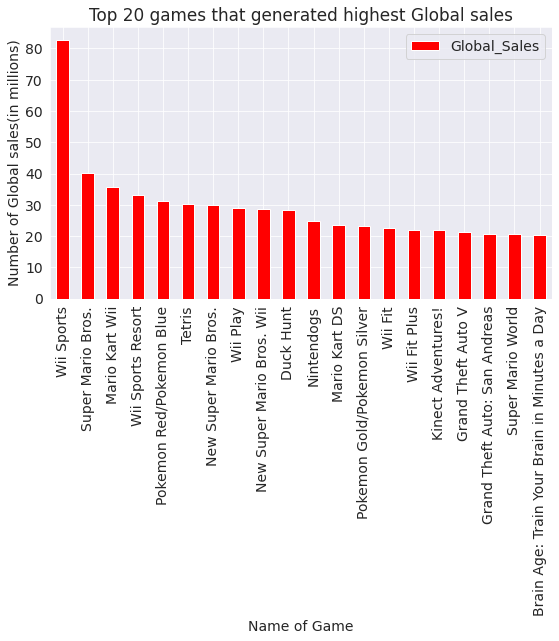

In [84]:
top20.plot.bar("Name","Global_Sales", color="r")
plt.xlabel("Name of Game")
plt.ylabel("Number of Global sales(in millions)")
plt.title("Top 20 games that generated highest Global sales")


In [85]:
# As we can see from the above,WII sports, Super Mario, Mario Kart , WII Sports Resort have top 4 highest sales globally.
# We can also see that in top 20, most of games are games of Mario and WII. These games generated highest global sales

In [87]:
# Before we had a graph that Nintendo one of the publisher which generated highest global sales. We can also see that
# Nintendo created games of Mario so Mario games generated higher sales for Nintendo.

#### Q2:Which genres generate highest Global sales?

Text(0.5, 0, 'Genre')

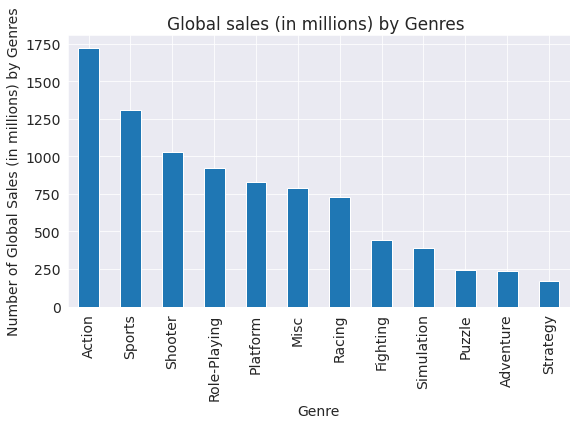

In [91]:
sales.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Global Sales (in millions) by Genres")
plt.title("Global sales (in millions) by Genres ")
plt.xlabel("Genre")

In [92]:
"From the above we can see that Genres such as  Action, sport and shooter generate the highest global sales around the world  "

'From the above we can see that Genres such as  Action, sport and shooter generate the highest global sales around the world  '

In [93]:
#### Q3:Which platform generate highest Global sales?

Let's find which platforms generate highest Global Sales?

In [94]:
sales.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False)

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
GB       254.42
XB       252.09
NES      251.07
3DS      246.27
N64      218.21
SNES     200.05
GC       197.14
XOne     141.06
2600      86.57
WiiU      81.86
PSV       61.60
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

Text(0.5, 0, 'platforms')

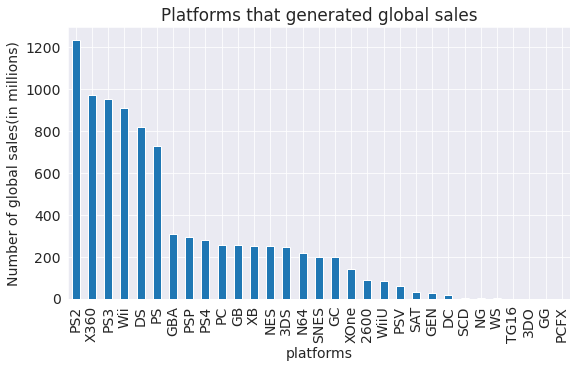

In [98]:
sales.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).plot.bar()
plt.title("Platforms that generated global sales")
plt.ylabel("Number of global sales(in millions)")
plt.xlabel("platforms")

In [101]:
# As we can see from the above,  PS2 and X360, and PS3 generated highest Global Sales.
#Before we also saw that Sony generated one of the highest global sales around the world.
#Sony created PS2 and PS3, and creation of these platforms helped Sony to generate higher global sales.

#### Q4: Which regions, countries have highest impact to Global sales?

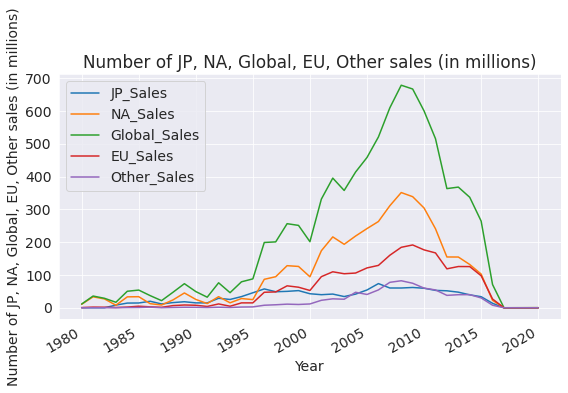

In [104]:
sales.groupby("Year")["JP_Sales"].sum().plot()
sales.groupby("Year")["NA_Sales"].sum().plot()
sales.groupby("Year")["Global_Sales"].sum().plot()
sales.groupby("Year")["EU_Sales"].sum().plot()
sales.groupby("Year")["Other_Sales"].sum().plot()
plt.title("Number of JP, NA, Global, EU, Other sales (in millions)")
plt.xlabel("Year")
plt.ylabel('Number of JP, NA, Global, EU, Other sales (in millions)')
plt.legend()

In [106]:
#  As we can see from the graph, that at the beginning NA sales, EU sales and other Sales, Japanese sales did not have
# much difference in global sales. But over the years, NA sales and EU sales started to dominate Global Sales.
# We can also see that world trend of global sales is almost same to the graph of EU sales and NA sales.


In [108]:
#Let's check also total sales by the region

<AxesSubplot:>

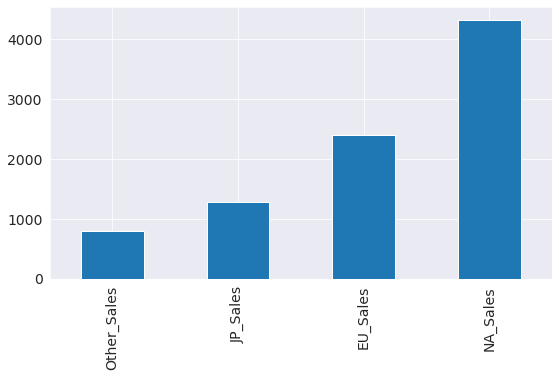

In [107]:
sales[["JP_Sales", "NA_Sales","EU_Sales","Other_Sales" ]].sum().sort_values().plot.bar()

In [109]:
#As we can also from this graph too NA_Sales and EU_Sales has the highest sales by the region.

#### Q5: Which genres is popular among  TOP Publishers?

In [110]:
sales.groupby("Genre")["Publisher"].value_counts().sort_values(ascending=False).head(10)

Genre    Publisher                   
Sports   Electronic Arts                 554
Action   Activision                      308
Sports   Konami Digital Entertainment    279
Action   Namco Bandai Games              247
         THQ                             193
         Ubisoft                         193
         Electronic Arts                 182
Racing   Electronic Arts                 159
Shooter  Activision                      155
Action   Capcom                          154
Name: Publisher, dtype: int64

Text(0.5, 0, 'Genre, Publisher')

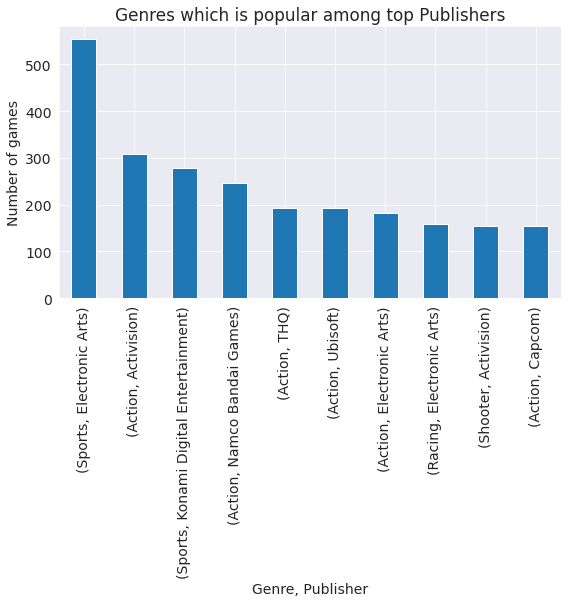

In [114]:
sales.groupby("Genre")["Publisher"].value_counts().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("Number of games")
plt.title("Genres which is popular among top Publishers")
plt.xlabel("Genre, Publisher")


In [116]:
# As we can see from the above, genres Sport is popular for electronic Arts while Action genre is popular for Activision.
# We can also see that Sports is also popular for Konami. As gamer who played Fifa and PES which are products of EA Sports 
# and Konami, I can confirm that both games are super popular in sports industry. 

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Inferences and Conclusion

Taking all the point into consideration, we can see that NA Sales and EU_sales have much impact in Global_Sales. And NA_Sales and EU_sales are mostly correlated with each other as we checked it from heatmap graph. Also, we have found that WII sports and Mario games have the highest sales globally. Genres such as action, sport and shooter generate the highest global sales. Platforms such as  PS2 and X360, and PS3 generated highest Global Sales. We also found that publishers such as  Nintendo, and Electronic Arts and Activision generate a highest Global Sales. So, it means overall to have higher global sales, publishers should do games in genres of actions, sports and shooter, and they need to concentrate more on North America and EU market to get higher global sales. Also, they need to make games for PS3 and X360 platforms to generated higher sales. Also, for investors who interested in game industry, they should invest in 
companies such as Nintendo and Electronic Arts, Activision, Sony cause they generated higher global sales around the world from 1980-2020.

However, with covid situation around the world everything can change, we need more dataset from 2020-2023, to analyze trends in global sales of games around the world and it could be the case that there is high demand for games. Because due to covid, a lot of people wor

In [ ]:
import jovian

In [ ]:
jovian.commit()

## References and Future Work
For future work it will be helpful to have more data from 2020-2023 and analyze the new trends especially to understand the covid effect on game industry around the world

[1] https://jovian.com/debbaudt-ruben/formula-one-visualized

In [ ]:
import jovian

In [ ]:
jovian.commit()